In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [11]:
df=pd.read_csv('/content/heights (1).csv')
df.head()

gender     height
0   Male  73.847017
1   Male  68.781904
2   Male  74.110105
3   Male  71.730978
4   Male  69.881796

In [12]:
df.sample(4)

gender     height
8959  Female  65.516922
4939    Male  70.358558
4090    Male  71.934843
9266  Female  65.592653

In [13]:
df.describe()

height
count  10000.000000
mean      66.367560
std        3.847528
min       54.263133
25%       63.505620
50%       66.318070
75%       69.174262
max       78.998742

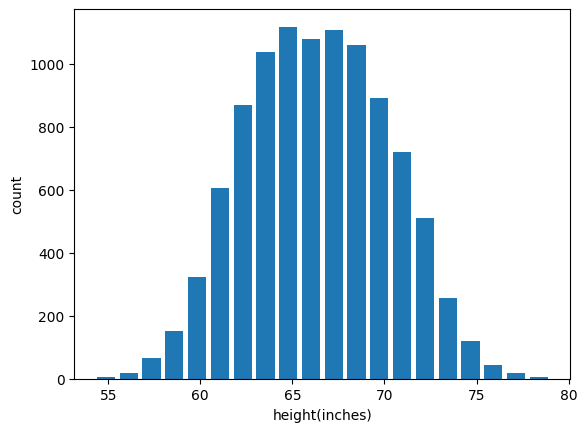

In [14]:
plt.hist(df['height'],bins=20,rwidth=0.8)
plt.xlabel('height(inches)')
plt.ylabel('count')
plt.show()

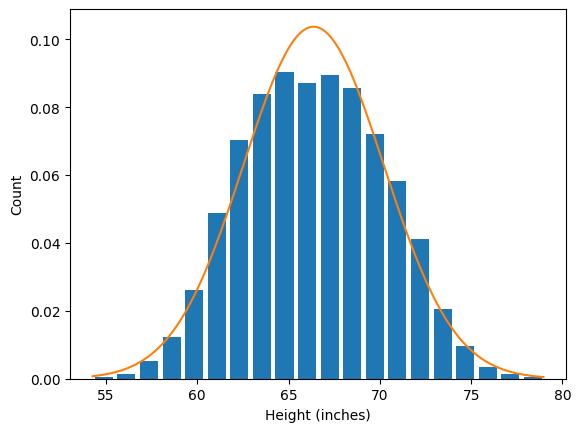

In [15]:
from scipy.stats import norm
import numpy as np
plt.hist(df.height, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(df.height.min(), df.height.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df.height.mean(),df.height.std()))

In [16]:
upper_limit=df.height.mean()+3*df.height.std()
upper_limit

77.91014411725271

In [17]:
lower_limit=df.height.mean()-3*df.height.std()
lower_limit

54.824975392479274

In [18]:
df[(df.height>upper_limit) | (df.height<lower_limit)]

gender     height
994     Male  78.095867
1317    Male  78.462053
2014    Male  78.998742
3285    Male  78.528210
3757    Male  78.621374
6624  Female  54.616858
9285  Female  54.263133

In [19]:
no_outlier=df[(df.height<upper_limit) & (df.height>lower_limit)]
no_outlier


gender     height
0       Male  73.847017
1       Male  68.781904
2       Male  74.110105
3       Male  71.730978
4       Male  69.881796
...      ...        ...
9995  Female  66.172652
9996  Female  67.067155
9997  Female  63.867992
9998  Female  69.034243
9999  Female  61.944246

[9993 rows x 2 columns]

In [20]:
df['score']=(df.height-df.height.mean())/df.height.std()
df

gender     height     score
0       Male  73.847017  1.943964
1       Male  68.781904  0.627505
2       Male  74.110105  2.012343
3       Male  71.730978  1.393991
4       Male  69.881796  0.913375
...      ...        ...       ...
9995  Female  66.172652 -0.050658
9996  Female  67.067155  0.181830
9997  Female  63.867992 -0.649655
9998  Female  69.034243  0.693090
9999  Female  61.944246 -1.149651

[10000 rows x 3 columns]

In [21]:
df[df.score>3]

gender     height     score
994    Male  78.095867  3.048271
1317   Male  78.462053  3.143445
2014   Male  78.998742  3.282934
3285   Male  78.528210  3.160640
3757   Male  78.621374  3.184854

In [22]:
df[df.score<-3]

gender     height     score
6624  Female  54.616858 -3.054091
9285  Female  54.263133 -3.146027

In [23]:
perfect=df[(df.height>3)|(df.height<-3)]
perfect

gender     height     score
0       Male  73.847017  1.943964
1       Male  68.781904  0.627505
2       Male  74.110105  2.012343
3       Male  71.730978  1.393991
4       Male  69.881796  0.913375
...      ...        ...       ...
9995  Female  66.172652 -0.050658
9996  Female  67.067155  0.181830
9997  Female  63.867992 -0.649655
9998  Female  69.034243  0.693090
9999  Female  61.944246 -1.149651

[10000 rows x 3 columns]

In [24]:
df=pd.read_csv('/content/bhp.csv')
df.head()

location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft  
0            3699  
1            4615  
2            4305  
3            6245  
4            4250

In [25]:
df.describe()

total_sqft          bath         price           bhk  price_per_sqft
count  13200.000000  13200.000000  13200.000000  13200.000000    1.320000e+04
mean    1555.302783      2.691136    112.276178      2.800833    7.920337e+03
std     1237.323445      1.338915    149.175995      1.292843    1.067272e+05
min        1.000000      1.000000      8.000000      1.000000    2.670000e+02
25%     1100.000000      2.000000     50.000000      2.000000    4.267000e+03
50%     1275.000000      2.000000     71.850000      3.000000    5.438000e+03
75%     1672.000000      3.000000    120.000000      3.000000    7.317000e+03
max    52272.000000     40.000000   3600.000000     43.000000    1.200000e+07

In [26]:
lower_limit=df['price_per_sqft'].quantile(0.001)
lower_limit

1366.184

In [27]:
upper_limit=df['price_per_sqft'].quantile(0.999)
upper_limit

50959.36200000098

In [28]:
df[df['price_per_sqft']>upper_limit]

location       size  total_sqft  bath   price  bhk  \
345                other  3 Bedroom        11.0   3.0    74.0    3   
1005               other      1 BHK        15.0   1.0    30.0    1   
1106               other  5 Bedroom        24.0   2.0   150.0    5   
4044      Sarjapur  Road  4 Bedroom         1.0   4.0   120.0    4   
4924               other      7 BHK         5.0   7.0   115.0    7   
5911         Mysore Road  1 Bedroom        45.0   1.0    23.0    1   
6356        Bommenahalli  4 Bedroom      2940.0   3.0  2250.0    4   
7012               other      1 BHK       650.0   1.0   500.0    1   
7575               other      1 BHK       425.0   1.0   750.0    1   
7799               other      4 BHK      2000.0   3.0  1063.0    4   
8307   Bannerghatta Road      5 BHK      2500.0   4.0  1400.0    5   
9436        Indira Nagar  4 Bedroom      2400.0   5.0  1250.0    4   
11447         Whitefield  4 Bedroom        60.0   4.0   218.0    4   
12328              other  4 Bedroom      4350.0   8.0  2600.0    4   

       price_per_sqft  
345            672727  
1005           200000  
1106           625000  
4044         12000000  
4924          2300000  
5911            51111  
6356            76530  
7012            76923  
7575           176470  
7799            53150  
8307            56000  
9436            52083  
11447          363333  
12328           59770

In [29]:
df[df['price_per_sqft']<lower_limit]

location       size  total_sqft  bath  price  bhk  price_per_sqft
665    Yelahanka      3 BHK     35000.0   3.0  130.0    3             371
798        other  4 Bedroom     10961.0   4.0   80.0    4             729
1867       other  3 Bedroom     52272.0   2.0  140.0    3             267
2392       other  4 Bedroom      2000.0   3.0   25.0    4            1250
3934       other      1 BHK      1500.0   1.0   19.5    1            1300
5343       other      9 BHK     42000.0   8.0  175.0    9             416
5417      Ulsoor      4 BHK     36000.0   4.0  450.0    4            1250
5597    JP Nagar      2 BHK      1100.0   1.0   15.0    2            1363
7166   Yelahanka  1 Bedroom     26136.0   1.0  150.0    1             573
7862    JP Nagar      3 BHK     20000.0   3.0  175.0    3             875
8300     Kengeri      1 BHK      1200.0   1.0   14.0    1            1166
9144       other  4 Bedroom     10961.0   4.0   80.0    4             729
11635      Begur      3 BHK      2400.0   3.0   12.0    3             500
12355      other      4 BHK     16335.0   4.0  149.0    4             912

In [30]:
df2=df[(df['price_per_sqft']<upper_limit) & (df['price_per_sqft']>lower_limit)]
df2.head()

location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft  
0            3699  
1            4615  
2            4305  
3            6245  
4            4250

In [31]:
upper_lim=df['price_per_sqft'].mean()+4*df['price_per_sqft'].std()
upper_lim

434828.97805485805

In [32]:
lower_lim=df['price_per_sqft'].mean()-4*df['price_per_sqft'].std()
lower_lim

-418988.3045700096

In [33]:
df2=df[(df['price_per_sqft']<upper_lim) & (df['price_per_sqft']>lower_lim)]
df2.head()

location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft  
0            3699  
1            4615  
2            4305  
3            6245  
4            4250

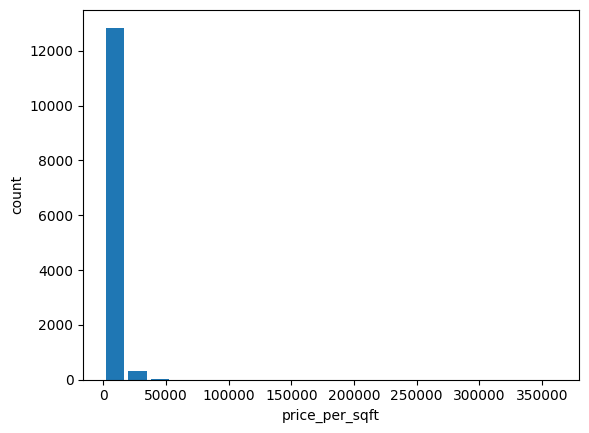

In [34]:
plt.hist(df2['price_per_sqft'],bins=20,rwidth=0.8)
plt.xlabel('price_per_sqft')
plt.ylabel('count')
plt.show()

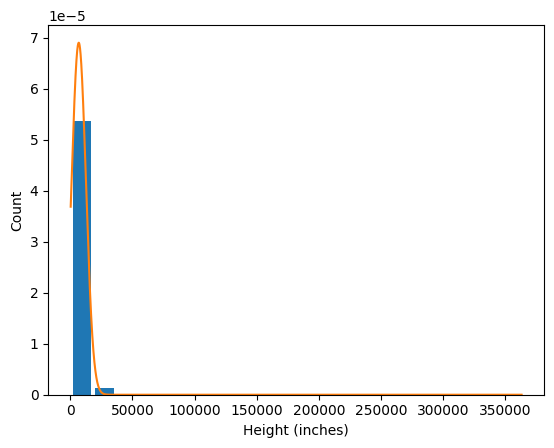

In [37]:
from scipy.stats import norm
import numpy as np
plt.hist(df2.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(df2.price_per_sqft.min(), df2.price_per_sqft.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df2.price_per_sqft.mean(),df2.price_per_sqft.std()))

In [38]:
df['zscore']=(df['price_per_sqft']-df.price_per_sqft.mean())/df.price_per_sqft.std()
df.head()



location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft    zscore  
0            3699 -0.039553  
1            4615 -0.030970  
2            4305 -0.033875  
3            6245 -0.015697  
4            4250 -0.034390

In [40]:
df[df['zscore']>4]

location       size  total_sqft  bath  price  bhk  price_per_sqft  \
345            other  3 Bedroom        11.0   3.0   74.0    3          672727   
1106           other  5 Bedroom        24.0   2.0  150.0    5          625000   
4044  Sarjapur  Road  4 Bedroom         1.0   4.0  120.0    4        12000000   
4924           other      7 BHK         5.0   7.0  115.0    7         2300000   

          zscore  
345     6.229030  
1106    5.781843  
4044  112.362023  
4924   21.476067

In [41]:
df[df.zscore<-4]

Empty DataFrame
Columns: [location, size, total_sqft, bath, price, bhk, price_per_sqft, zscore]
Index: []

In [43]:
df2=df[(df['zscore']<4) & (df['zscore']>-4)]
df2.head()

location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft    zscore  
0            3699 -0.039553  
1            4615 -0.030970  
2            4305 -0.033875  
3            6245 -0.015697  
4            4250 -0.034390